<a href="https://colab.research.google.com/github/habibsifat/Prediction-of-Lysine-Glutarylation/blob/master/Glutarylation_ALL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/BIO/Glutarylation(5).csv"

'/content/drive/My Drive/Colab Notebooks/BIO/Glutarylation(5).csv'


In [0]:
numpy.random.seed(0)
dataset = numpy.loadtxt("/content/drive/My Drive/Colab Notebooks/BIO/Ind_combined.csv", delimiter=",")
# split into input (X) and output (Y) variables, splitting csv data
IND_X_test = dataset[:,0:210]
IND_Y_test= dataset[:,210]

In [0]:
print(dataset.shape)
print(IND_X_test.shape)
print(IND_Y_test.shape)

(136, 211)
(136, 210)
(136,)


In [0]:
numpy.random.seed(0)
dataset = numpy.loadtxt("/content/drive/My Drive/Colab Notebooks/BIO/Glutarylation(5).csv", delimiter=",")
# split into input (X) and output (Y) variables, splitting csv data
X1 = dataset[:,0:210]
Y1 = dataset[:,210]

In [0]:
print(dataset.shape)
print(X1.shape)
print(Y1.shape)

(5436, 211)
(5436, 210)
(5436,)


# Combination of over- and under-sampling

In [0]:
>>> from imblearn.combine import SMOTEENN
>>> smote_enn = SMOTEENN(random_state=0)
>>> X,Y = smote_enn.fit_resample(X1, Y1)

In [0]:
print(X.shape)
print(Y.shape)

(6818, 210)
(6818,)


In [0]:
>>> from imblearn.combine import SMOTETomek
>>> smote_tomek = SMOTETomek(random_state=0)
>>> X , Y = smote_tomek.fit_resample(X1, Y1)

In [0]:
print(X.shape)
print(Y.shape)

(3770, 210)
(3770,)


In [0]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [0]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in Y1]
plt.scatter(X1[:, 0], X1[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("Main Dataset ($n_{class}=5349)$")

# Data Balance By 3 Way

In [0]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [0]:
#Random Under Sampling
rus = RandomUnderSampler(random_state=0)
rus.fit(X1, Y1)
X, Y = rus.fit_resample(X1, Y1)

In [0]:
# ClusterCentroids
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
sampler = ClusterCentroids()
X,Y = sampler.fit_sample(X1, Y1)

In [0]:
#Ensemble
from imblearn.ensemble import EasyEnsemble
e = EasyEnsemble(random_state=0, n_subsets=10)
e.fit(X1, Y1)
X, Y = e.fit_sample(X1, Y1)

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in Y[0, :]]
plt.scatter(X[0, :, 0], X[0, :, 1], c=colors, linewidth=1, edgecolor='black')
sns.despine()

In [0]:
print(X.shape)
print(Y.shape)

(1446, 210)
(1446,)


In [0]:
# splitting the data into training and test sets (80:20)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=10)

In [0]:
from imblearn.over_sampling import SMOTE
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/combined.csv')
# Separate input features and target
Y1 = df.Classs
X1 = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, Y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

# **For SS sir idea**

In [0]:
#For SS sir idea
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.2,random_state=10)

In [0]:
# ClusterCentroids
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
sampler = ClusterCentroids()
X_train,Y_train = sampler.fit_sample(X_train1, Y_train1)

# **Training Start**

In [0]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)
# shape of new y objects
print(Y_train.shape)
print(Y_test.shape)

(5454, 210)
(1364, 210)
(5454,)
(1364,)


# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, lr_pred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, lr_pred)
print(confusion_matrix(Y_test, lr_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, lr_pred)  
print("MCC = ",mcc1)

Train Accuracy ::  0.8355855855855856
Test Accuracy  ::  0.8319579894973743
[[268 168]
 [ 56 841]]
Accuracy :  0.8319579894973743
Sensitivity :  0.6146788990825688
Specificity :  0.9375696767001115
MCC =  0.6040264860152442


# **Naive Bayes**

In [0]:
#Naive-Bayes Model
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(X_train, Y_train)

# Predict Output 
NBpred = model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, NBpred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, NBpred)
print(confusion_matrix(Y_test, NBpred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, NBpred)  
print("MCC = ",mcc1)

Train Accuracy ::  0.7704579579579579
Test Accuracy  ::  0.7726931732933233
[[255 181]
 [122 775]]
Accuracy :  0.7726931732933233
Sensitivity :  0.5848623853211009
Specificity :  0.8639910813823858
MCC =  0.46756762101468324


# **Decision** **Tree**

In [0]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,classifier.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Y_pred))
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
cm1=confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc2=matthews_corrcoef(Y_test, Y_pred)  
print("MCC = ",mcc2)

Train Accuracy ::  1.0
Test Accuracy  ::  0.8634658664666166
[[328 108]
 [ 74 823]]
Accuracy :  0.8634658664666166
Sensitivity :  0.7522935779816514
Specificity :  0.9175027870680045
MCC =  0.6846906313518152


# **SVM**


In [0]:
#SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

SVM_pred = svclassifier.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,svclassifier.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, SVM_pred))
#Independent
IND_pred = svclassifier.predict(IND_X_test)
print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))

cm1=confusion_matrix(Y_test, SVM_pred)
print(confusion_matrix(Y_test, SVM_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc3=matthews_corrcoef(Y_test, SVM_pred)  
print("MCC = ",mcc3)

# **Random Forest**

In [0]:
#Random Forest
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=42)
model=clf.fit(X_train, Y_train)
print("Trained model :: ",model)
predictions =model.predict(X_test)
 
print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, predictions))
#Independent
IND_pred = model.predict(IND_X_test)
print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))
#print(" Confusion matrix ", confusion_matrix(Y_test, predictions))  
cm1=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc4=matthews_corrcoef(Y_test, predictions)  
print("MCC = ",mcc4)

Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Train Accuracy ::  0.753780718336484
Test Accuracy  ::  0.7754716981132076
Independent Test Accuracy  ::  0.6985294117647058
[[401   0]
 [119  10]]
Accuracy :  0.7754716981132076
Sensitivity :  1.0
Specificity :  0.07751937984496124
MCC =  0.2444981961465213


# **Ada-Boost**

In [0]:
#Ada-Boost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Model=clf.fit(X_train,Y_train)  
#AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
     #   learning_rate=1.0, n_estimators=100, random_state=0)
print("Trained model :: ",Model)
Ada_pred =Model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,Model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Ada_pred))
#Independent
IND_pred = Model.predict(IND_X_test)
print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))

print(" Confusion matrix ", confusion_matrix(Y_test, Ada_pred)) 
cm1=confusion_matrix(Y_test, Ada_pred)
print(confusion_matrix(Y_test, Ada_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc5=matthews_corrcoef(Y_test, Ada_pred)  
print("MCC = ",mcc5)

Trained model ::  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)
Train Accuracy ::  0.8322306238185255
Test Accuracy  ::  0.7566037735849057
Independent Test Accuracy  ::  0.7647058823529411
 Confusion matrix  [[357  44]
 [ 85  44]]
[[357  44]
 [ 85  44]]
Accuracy :  0.7566037735849057
Sensitivity :  0.8902743142144638
Specificity :  0.34108527131782945
MCC =  0.26680997878484075


# **KNN**

In [0]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,Y_train)
        Y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(Y_test,Y_pred)
        scores_list.append(metrics.accuracy_score(Y_test,Y_pred))

In [0]:
scores

{1: 0.9802052785923754,
 2: 0.9831378299120235,
 3: 0.9464809384164223,
 4: 0.9516129032258065,
 5: 0.8958944281524927,
 6: 0.908357771260997,
 7: 0.8621700879765396,
 8: 0.8695014662756598,
 9: 0.8306451612903226,
 10: 0.8453079178885631,
 11: 0.8211143695014663,
 12: 0.8343108504398827,
 13: 0.8005865102639296,
 14: 0.8101173020527859,
 15: 0.7785923753665689,
 16: 0.7917888563049853,
 17: 0.7697947214076246,
 18: 0.783724340175953,
 19: 0.7602639296187683,
 20: 0.7705278592375366,
 21: 0.7543988269794721,
 22: 0.7609970674486803,
 23: 0.7426686217008798,
 24: 0.7529325513196481,
 25: 0.7382697947214076}

Text(0, 0.5, 'Testing Accuracy')

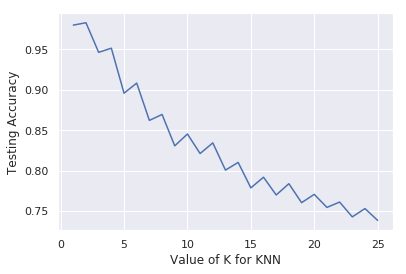

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [0]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X,Y)
KNNpred = knn.predict(X_test)

In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,knn.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, KNNpred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, KNNpred)
print(confusion_matrix(Y_test, KNNpred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, KNNpred)  
print("MCC = ",mcc1)

In [0]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

K = 10
acc = -7
Sn = -7
Sp = -7
C = -7
sigma = -7
error = 77777777

for p in range(-8, 9):
    for q in range(-8, 9):
        svm = SVC(C=2**p, gamma=2**q)
        y_pred = cross_val_predict(svm, X_test, Y_test, cv=K)
            
        cm = confusion_matrix(Y_test, y_pred)
        pos = cm[1,1] / (cm[1,1] + cm[1,0])
        neg = cm[0,0] / (cm[0,0] + cm[0,1])
            
        err = abs(pos-neg)
            
        if (error>err):
            error = err
            C = 2**p
            sigma = 2**q
            Sn = pos
            Sp = neg
            acc = accuracy_score(Y_test, y_pred)
            print(acc)

# Bagging

In [0]:
>>> from imblearn.ensemble import BalancedBaggingClassifier
>>> bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
...                                 sampling_strategy='auto',
...                                 replacement=False,
...                                 random_state=0)
>>> bbc.fit(X_train, Y_train)
Bagpred = bbc.predict(X_test)

In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,bbc.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Bagpred))

#Independent
IND_pred = bbc.predict(IND_X_test)
print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, Bagpred)
print(confusion_matrix(Y_test, Bagpred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, Bagpred)  
print("MCC = ",mcc1)

Train Accuracy ::  0.9508506616257089
Test Accuracy  ::  0.7113207547169811
Independent Test Accuracy  ::  0.8308823529411765
[[327  74]
 [ 79  50]]
Accuracy :  0.7113207547169811
Sensitivity :  0.8154613466334164
Specificity :  0.3875968992248062
MCC =  0.2058324352213182


# Balanced Random Forest

In [0]:
>>> from imblearn.ensemble import BalancedRandomForestClassifier
>>> brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
>>> brf.fit(X_train, Y_train) 
brf_pred=brf.predict(X_test)

In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,brf.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, brf_pred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, brf_pred)
print(confusion_matrix(Y_test, brf_pred))
#print(classification_report(Y_test, brf_pred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, brf_pred)  
print("MCC = ",mcc1)

Train Accuracy ::  0.9253308128544423
Test Accuracy  ::  0.6566037735849056
[[258 143]
 [ 39  90]]
Accuracy :  0.6566037735849056
Sensitivity :  0.6433915211970075
Specificity :  0.6976744186046512
MCC =  0.294882641007345


# Boosting

In [0]:
>>> from imblearn.ensemble import RUSBoostClassifier
>>> rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R', random_state=0)
>>> rusboost.fit(X_train, Y_train)  
>>> Y_pred = rusboost.predict(X_test)

In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,rusboost.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Y_pred))

#Independent
IND_pred = rusboost.predict(IND_X_test)
print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))

#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
cm1=confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc2=matthews_corrcoef(Y_test, Y_pred)  
print("MCC = ",mcc2)